# Interactive demos in IPython

In [1]:
%matplotlib notebook
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from IPython.display import display
from matplotlib import rcParams


rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

## Fourier series of periodic functions

In [2]:
def waves(N=10, f=1, wtype='square'):
    t = np.linspace(0, 2, 1000)
    x = np.zeros_like(t)
   
    for k in range(1, N+1):
        if wtype=='square':
            x = x + 4/np.pi*np.sin(2*np.pi*(2*k - 1)*f*t)/(2*k-1)
        if wtype=='sawtooth':
            x = x + 2*(-1)**(k+1)/np.pi*np.sin(2*np.pi*k*f*t)/k
        if wtype=='triangle':
            n = k - 1
            x = x + 8/np.pi**2*(-1)**n*np.sin(2*np.pi*(2*n + 1)*f*t)/(2*n +1)**2
    
    plt.subplots(figsize=(8,4))
    plt.plot(t, x, lw=2)
    plt.ylim(-1.5, 1.5)

<IPython.core.display.Javascript object>


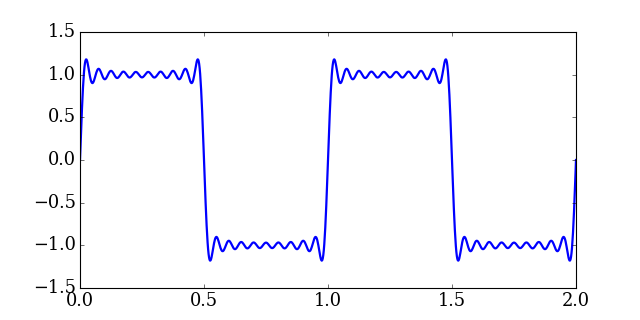

None

In [3]:
w = interact(waves,
             N=(1,400),
             f=(1.,10.),
             wtype=('square','sawtooth','triangle'))

## Mohr circle for 2D stresses

In [4]:
def mohr(S11=10, S12=0, S22=-5):
    """Plot Mohr circle for a 2D tensor"""
    center = [(S11 + S22)/2.0, 0.0]
    radius = np.sqrt((S11 - S22)**2/4.0 + S12**2)
    Smin = center[0] - radius
    Smax = center[0] + radius
    
    
    print "Minimum Normal Stress: ", np.round(Smin,6)
    print "Maximum Normal Stress: ", np.round(Smax, 6)
    print "Average Normal Stress: ", np.round(center[0], 6)
    print "Minimum Shear Stress: ", np.round(-radius, 6)
    print "Maximum Shear Stress: ", np.round(radius, 6)
   
    plt.subplots(figsize=(6,6))
    circ = plt.Circle((center[0],0), radius, facecolor='#cce885', lw=3,
    edgecolor='#5c8037') 
    plt.axis('image')
    ax = plt.gca() 
    ax.add_artist(circ)
    ax.set_xlim(Smin - .1*radius, Smax + .1*radius)
    ax.set_ylim(-1.1*radius, 1.1*radius)
    plt.plot([S22, S11], [S12, -S12], 'ko')
    plt.plot([S22, S11], [S12, -S12], 'k')
    plt.plot(center[0], center[1], 'o', mfc='w')
    plt.text(S22 + 0.1*radius, S12, 'A')
    plt.text(S11 + 0.1*radius, -S12, 'B')
    plt.xlabel(r"$\sigma$", size=18)
    plt.ylabel(r"$\tau$", size=18) 
        

Minimum Normal Stress:  -5.0
Maximum Normal Stress:  10.0
Average Normal Stress:  2.5
Minimum Shear Stress:  -7.5
Maximum Shear Stress:  7.5


<IPython.core.display.Javascript object>


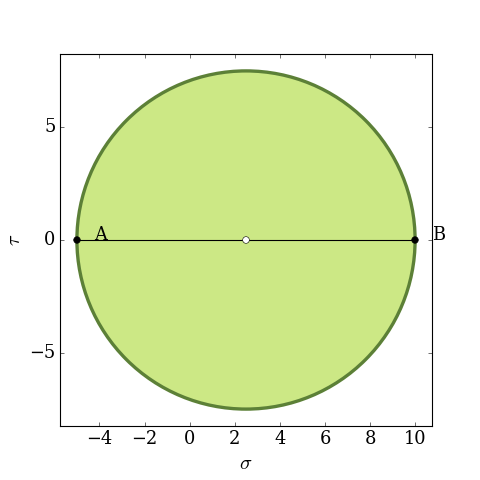

None

In [5]:
w = interact(mohr,
             S11=(-100.,100.),
             S12=(-100.,100.),
             S22=(-100.,100.))

In [6]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()